In [1]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:

def decompose(df, column):
    
    invalids = df[column].isna()
    print(f"WARNING: Invalids: {invalids.sum()}, invalids are dropped from the series")
    #df = df.set_index('Date')[column]
    series = df[column].dropna()
    
    # decompose = seasonal_decompose(series, model='additive', extrapolate_trend='freq', period=12)
    seasonal = seasonal_decompose(series, model='multiplicative', extrapolate_trend='freq', period=12).seasonal
    trend = seasonal_decompose(series, model='multiplicative', extrapolate_trend='freq', period=12).trend
    resid = seasonal_decompose(series, model='multiplicative', extrapolate_trend='freq', period=12).resid
    # decompose.plot().show()

    return seasonal, trend, resid


In [4]:
# Enter file name for CO data
df = pd.read_csv('data/processed/interpolated_and_trends/interpolated_complete_payerne.csv')
print(df.dtypes)
invalid_dates = df[df['Date'].isna()]
print("Invalid rows:\n", invalid_dates)


Date                        object
Traffic                    float64
CO (mg/m³)                 float64
Traffic_interpolated       float64
CO (mg/m³)_interpolated    float64
dtype: object
Invalid rows:
 Empty DataFrame
Columns: [Date, Traffic, CO (mg/m³), Traffic_interpolated, CO (mg/m³)_interpolated]
Index: []


In [5]:

df=df.drop(columns=['Traffic','CO (mg/m³)'])
print(df.columns)
df.columns = ['Date', 'Traffic','CO (mg/m³)']
print(df.columns)

    


Index(['Date', 'Traffic_interpolated', 'CO (mg/m³)_interpolated'], dtype='object')
Index(['Date', 'Traffic', 'CO (mg/m³)'], dtype='object')


In [6]:
components = {}
for col in df.columns:
    if col != 'Date':  # skip Date column if not already index
        seas, trend, resid = decompose(df, col)
        components[col] = {
            'seasonal': seas,
            'trend': trend,
            'residual': resid
        }


Plotting Traffic trend
Plotting CO (mg/m³) trend


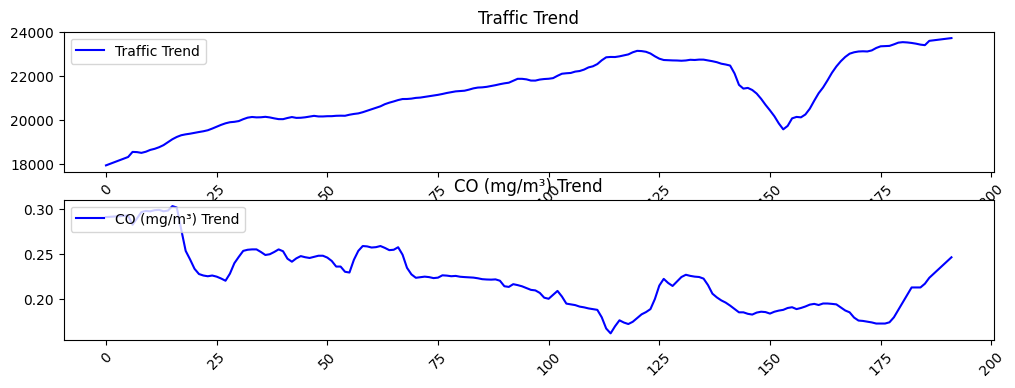

In [14]:
# Plot Trends
import matplotlib.dates as mdates
# plot trends of each data column
num_plots = len(df.columns) - 1
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 2))
# Loop over each column and plot the trend in the corresponding subplot
for idx, col in enumerate(df.columns):
    if col == 'Date':
        continue
    print(f"Plotting {col} trend")
    axes[idx-1].plot(components[col]['trend'].index, components[col]['trend'], label=f'{col} Trend', color='b')
    axes[idx-1].set_title(f'{col} Trend')
    axes[idx-1].legend(loc='upper left')
    axes[idx-1].tick_params(axis='x', rotation=45)

Plotting Traffic residuals
Plotting CO (mg/m³) residuals


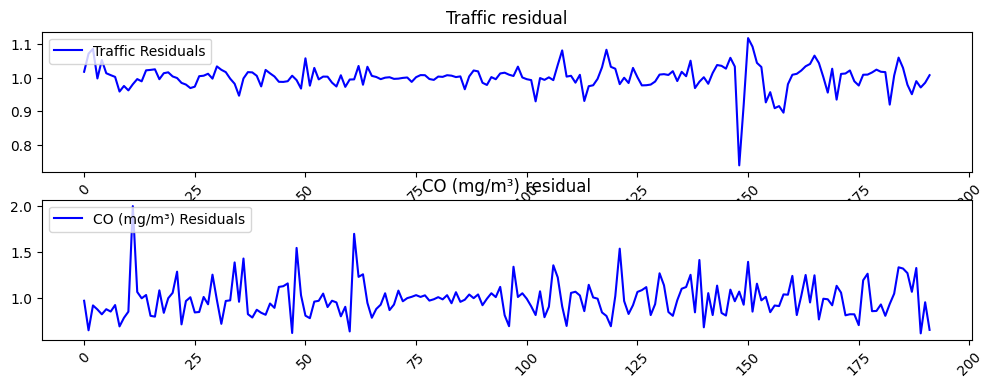

In [7]:
# Plot residuals
num_plots = len(df.columns) - 1
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots * 2))
# Loop over each column and plot the trend in the corresponding subplot
for idx, col in enumerate(df.columns):
    if col == 'Date':
        continue
    print(f"Plotting {col} residuals")
    axes[idx-1].plot(components[col]['residual'].index, components[col]['residual'], label=f'{col} Residuals', color='b')
    axes[idx-1].set_title(f'{col} residual')
    axes[idx-1].legend(loc='upper left')
    axes[idx-1].tick_params(axis='x', rotation=45)

In [15]:
# export trends to csv
df_trends = pd.DataFrame(columns=['Traffic', 'CO (mg/m³)'])
for col in df_trends.columns:
    df_trends[col] = components[col]['trend']
print(df_trends)   

          Traffic  CO (mg/m³)
0    17943.138983    0.291046
1    18019.237901    0.291390
2    18095.336818    0.291734
3    18171.435736    0.292078
4    18247.534653    0.292421
..            ...         ...
187  23627.054087    0.227884
188  23652.034827    0.232460
189  23677.015568    0.237036
190  23701.996308    0.241611
191  23726.977049    0.246187

[192 rows x 2 columns]


In [16]:
df_trends.to_csv('data/processed/trends_payerne.csv', index=False)